# Audi Price Predictions R^2 ~ 0.96

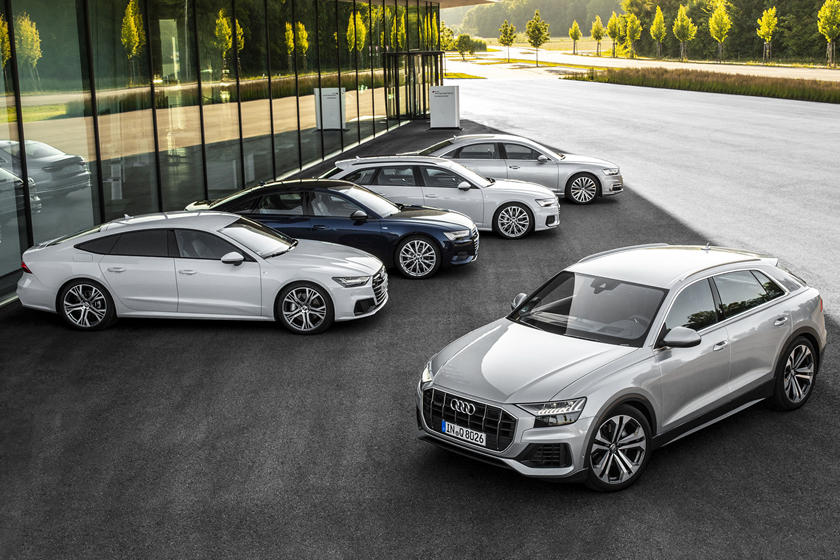

### hello kagglers, I have used many Regression models in this notebook inorder to find a best regression model out of it.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

### reading the dataset using pandas

In [ ]:
df_audi = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/audi.csv')

In [ ]:
df_audi.head()

### To see how many unique types are there in each category columns,

In [ ]:
print(df_audi['fuelType'].unique())
print(df_audi['transmission'].unique())
print(df_audi['model'].unique())

### lets see if the columns in the dataset has some missing values

In [ ]:
df_audi.isnull().sum()

### its good to say that there are no missing values in any of the columns in the datset

## EDA and Visualizations

In [ ]:
listy = ['model', 'transmission', 'fuelType', 'engineSize', 'year']
for i in listy:
    plt.figure(figsize=(12, 5))
    sns.countplot(df_audi[i])
    plt.show()

In [ ]:
for i in listy:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=df_audi[i], y=df_audi['price'])
    plt.show()

In [ ]:
age_of_car = 2020 - df_audi['year']

In [ ]:
df_audi.drop('year', axis=1, inplace=True)

In [ ]:
df_audi['age_of_car'] = age_of_car

In [ ]:
sns.countplot(df_audi['age_of_car'])

In [ ]:
sns.residplot(df_audi['mileage'], df_audi['price'] )

## The above resid plot of price with respect to mileage is not  distributed all over . so it is a good fit for linear models

In [ ]:
df_audi.corr()

In [ ]:
df_audi.head()

### using pd.dummies to transform categorical variables to numeric data, we can even use one hot encoding

In [ ]:
df = pd.get_dummies(df_audi)

In [ ]:
df.head()

In [ ]:
df.shape

### Model Developement & evaluation

### training and testing data

In [ ]:
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
def plot(a, title):
    plt.figure(figsize=(8, 5))
    sns.distplot(a, hist=False, color='r', label='predicted')
    sns.distplot(y_test, hist=False, color='b', label='actual')
    plt.title(title)
    plt.show()

## Linear Regression

In [ ]:
lr = LinearRegression()
Input1 = [('scale', StandardScaler()), ('model', lr)]
pipe1 = Pipeline(Input1)
pipe1.fit(x_train, y_train)
yhat1 = pipe1.predict(x_test)

In [ ]:
lr_score = r2_score(yhat1, y_test)
print('The r^2 score for Linear Regression is {}'.format(lr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat1-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat1-y_test)**2))    

### lets see how well the model predicts with the fitted model

In [ ]:
plot(yhat1, 'Linear Regression')

## XGBRegressor

In [ ]:
model = XGBRegressor(random_state=2)
model.fit(x_train, y_train)
yhat2 = model.predict(x_test)

In [ ]:
xgb_score = r2_score(yhat2, y_test)
print('The r^2 score for XGBRegressor is {}'.format(xgb_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat2-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat2-y_test)**2))  

In [ ]:
plot(yhat2, 'XGBRegressor')

## Random Forest Regressor

In [ ]:
pipe2 = Pipeline([('preprocessor', SimpleImputer()), ('model', RandomForestRegressor(n_estimators= 1000, random_state=0))])
score = -1*cross_val_score(pipe2, x_train, y_train , cv=5, scoring='neg_mean_absolute_error')
print('cross_val_score of Random Forest Regressor is {}'.format(score.mean()))
pipe2.fit(x_train, y_train)
yhat3 = pipe2.predict(x_test)

In [ ]:
rfr_score = r2_score(yhat3, y_test)
print('The r^2 score for Random Forest Regressor is {}'.format(rfr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat3-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat3-y_test)**2))  

In [ ]:
plot(yhat3, 'Random Forest Regressor')

## Decision Tree Regressor

In [ ]:
audi_tree = DecisionTreeRegressor(random_state=1)
audi_tree.fit(x_train, y_train)
yhat4 = audi_tree.predict(x_test)

In [ ]:
dtr_score = r2_score(yhat4, y_test)
print('The r^2 score for Decision Tree classifier is {}'.format(dtr_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat4-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat4-y_test)**2))  

In [ ]:
plot(yhat4, 'Decision Tree Regressor')

## Ridge Regression

### using grid search to find out which alpha value has high score for ridge regression

In [ ]:
parameter = [{'alpha': [0.001, 0.1, 0.4, 10, 100, 1000, 10000, 100000]}]
rr = Ridge()
grid1 = GridSearchCV(rr, parameter, cv=4)
grid1.fit(x_train, y_train)
grid1.best_estimator_
scores = grid1.cv_results_
scores['mean_test_score']

In [ ]:
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(x_train, y_train)
yhat5 = ridge_model.predict(x_test)

In [ ]:
ridge_score = r2_score(yhat5, y_test)
print('The r^2 score for Ridge Regression is {}'.format(ridge_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat5-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat5-y_test)**2))  

In [ ]:
plot(yhat5, 'Ridge Regression')

## Lasso Regression

In [ ]:
lasso_model = Lasso(alpha=0.4)
lasso_model.fit(x_train, y_train)
yhat6 = lasso_model.predict(x_test)

In [ ]:
lasso_score = r2_score(yhat6, y_test)
print('The r^2 score for Lasso Regression is {}'.format(lasso_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat6-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat6-y_test)**2))  

In [ ]:
plot(yhat6, 'Lasso Regression')

## Bayesian Regression

In [ ]:
bay_ridge_model = BayesianRidge()
bay_ridge_model.fit(x_train, y_train)
yhat7 = bay_ridge_model.predict(x_test)

In [ ]:
bay_ridge_score = r2_score(yhat7, y_test)
print('The r^2 score for bayesian Ridge Regression is {}'.format(bay_ridge_score))
print('The mean absolute error is {}'.format(np.mean(np.absolute(yhat7-y_test))))
print('Residual sum of squares : {}'.format(np.mean(yhat7-y_test)**2))  

In [ ]:
plot(yhat7, 'Bayesian Ridge Regression')

### using polynomial features to check if the model predicts better

### applying polynomial degree =2

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)

In [ ]:
listy2 = [LinearRegression(),XGBRegressor(n_estimators=1000, learning_rate=0.06, random_state=3, n_jobs=2),
         BayesianRidge(),Lasso(alpha=0.4),Ridge(alpha=0.4) , DecisionTreeRegressor(random_state=1),
          RandomForestRegressor(n_estimators= 1000, random_state=0)]
listy_title = ['Linear Regression', 'XGBRegressor', 'bayesian Ridge', 'Lasso', 'Ridge', 'DecisionTreeRegressor',
              'Random Forest Regressor']

In [ ]:
poly_score=[]
for regr, title in zip(listy2, listy_title):
    model = regr
    model.fit(x_train_pr, y_train)
    yhat = model.predict(x_test_pr)
    rs = r2_score(yhat, y_test)
    poly_score.append(rs)
    print('The r^2 score of {} is {}'.format(title, rs))

In [ ]:
score = pd.DataFrame({
    'models': listy_title,
    'normal r^2 score': [lr_score, xgb_score, bay_ridge_score,
                         lasso_score, ridge_score,  dtr_score, rfr_score],
    'poly r^2 score': poly_score
})
score

## from the r^2 scores XGBRegressor ~0.96 is the best model for prediction, even other models too has r^2 score greater than 0.90

## upvoting is a way of appreciation
## if you like it, do upvote 👍